1-B

In [1]:
import numpy as np


def rec_bb(t: list, f: int, l: int, key: int):
    if l < f:
        return None
    root = (f+l)//2 # este es sería el root para mejor tiempo
    #root = l
    if key < t[root]:
        return rec_bb(t, f, root, key)
    elif key > t[root]:
        return rec_bb(t, root, l, key)
    
    return root



def bb(t: list, f: int, l: int, key: int):
    
    while f <= l:
        root = (f+l)//2 # este es sería el root para mejor tiempo
        #root = l
        if t[root] > key: #
            l = root-1
        elif t[root] < key:
            f = root+1
        elif t[root] == key:
            return root
    
    return None


# timings para bb recursiva 
l_timings_rec = [] 
l_timings_ite = []
for i, size in enumerate(range(5, 15)):
    t = list(range(2**i * size))
    key = t[0]
    #print(t)
    timings_rec = %timeit -n 100 -r 10 -o -q rec_bb(t, 0, len(t) - 1, key)
    timings_ite = %timeit -n 100 -r 10 -o -q bb(t, 0, len(t) - 1, key)
    l_timings_rec.append([int(len(t)), timings_rec.best])
    l_timings_ite.append([int(len(t)), timings_ite.best])

a_timings_rec = np.array(l_timings_rec)
a_timings_ite = np.array(l_timings_ite)

a_timings_rec
a_timings_ite





array([[5.00000000e+00, 4.57610004e-07],
       [1.20000000e+01, 5.70680004e-07],
       [2.80000000e+01, 6.75480005e-07],
       [6.40000000e+01, 9.14480006e-07],
       [1.44000000e+02, 9.64640003e-07],
       [3.20000000e+02, 1.11842000e-06],
       [7.04000000e+02, 1.26969000e-06],
       [1.53600000e+03, 1.40360000e-06],
       [3.32800000e+03, 1.57128999e-06],
       [7.16800000e+03, 1.70924000e-06]])

In [11]:
import numpy as np
from p203 import time_kruskal, time_kruskal_2

a_timings_rec = np.array(time_kruskal(10, 10, 200, 10))
a_timings_ite = np.array(time_kruskal_2(10, 10, 200, 10))


print(a_timings_rec)
print(a_timings_ite)



[[1.00000000e+01 2.54321098e-04]
 [2.00000000e+01 1.16434097e-03]
 [3.00000000e+01 2.67195702e-03]
 [4.00000000e+01 4.25903797e-03]
 [5.00000000e+01 6.67359829e-03]
 [6.00000000e+01 1.00546360e-02]
 [7.00000000e+01 1.37234688e-02]
 [8.00000000e+01 1.79910660e-02]
 [9.00000000e+01 2.32682228e-02]
 [1.00000000e+02 2.86623716e-02]
 [1.10000000e+02 3.49857330e-02]
 [1.20000000e+02 4.21624184e-02]
 [1.30000000e+02 5.33943415e-02]
 [1.40000000e+02 5.79466581e-02]
 [1.50000000e+02 6.64721489e-02]
 [1.60000000e+02 7.56464720e-02]
 [1.70000000e+02 8.91353130e-02]
 [1.80000000e+02 9.65534687e-02]
 [1.90000000e+02 1.07954645e-01]
 [2.00000000e+02 1.23355103e-01]]
[[1.00000000e+01 8.79526138e-05]
 [2.00000000e+01 3.13687325e-04]
 [3.00000000e+01 7.18903542e-04]
 [4.00000000e+01 1.27875805e-03]
 [5.00000000e+01 2.01005936e-03]
 [6.00000000e+01 2.91261673e-03]
 [7.00000000e+01 4.04374599e-03]
 [8.00000000e+01 5.19862175e-03]
 [9.00000000e+01 6.55617714e-03]
 [1.00000000e+02 8.18035603e-03]
 [1.10000

1-C

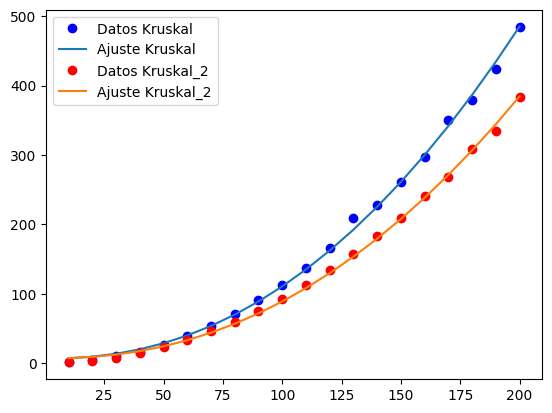

In [16]:
from scipy.optimize import curve_fit
import math
import matplotlib.pyplot as plt

def tofit(x, a, b):
    return a * x**2 * np.log(x) + b # f(x) = x**3 for matrix mult

x = a_timings_rec[: , 0]
y = a_timings_rec[: , 1]
y = y / y[0] #normalizar timings
pars, _ = curve_fit(tofit, x, y)
a, b = pars
plt.plot(x, y, 'bo', label='Datos Kruskal')
plt.plot(x, tofit(x, a, b), label='Ajuste Kruskal')
#plt.legend()
#plt.show()

x1 = a_timings_ite[: , 0]
y1 = a_timings_ite[: , 1]
y1 = y1 / y1[0] #normalizar timings
pars, _ = curve_fit(tofit, x1, y1)
a, b = pars
plt.plot(x1, y1, 'ro', label='Datos Kruskal_2')
plt.plot(x1, tofit(x1, a, b), label='Ajuste Kruskal_2')
plt.ticklabel_format(axis='y', useOffset=False)
plt.legend()
plt.show()





A2

In [30]:
import numpy as np

tes = np.array([1, 2, 4, 90, 10, 12, 15, 20, 22])

def min_heapify(h: np.ndarray, i: int):
    while 2*i+1 < h.shape[0]:
        next_i = i
        if h[next_i] > h[2*i+1]:
            next_i = 2*i+1
        if 2*i+2 < h.shape[0] and h[next_i] > h[2*i+2]:
            next_i = 2*i+2
        if next_i > i:
            h[i], h[next_i] = h[next_i], h[i]
            i = next_i
        else:
            return



min_heapify(tes, 3)
print(tes.tolist())


def insert_min_heap(h: np.ndarray, k: int):
    h += [k]
    j = h.shape[0] - 1
    while j >= 1 and h[(j-1) // 2] > h[j]:
        h[(j-1) // 2], h[j] = h[j], h[(j-1) // 2]
        j = (j-1) // 2


    return h

[1, 2, 4, 20, 10, 12, 15, 90, 22]


In [33]:
# II-A 3.

def create_min_heap(h:np.ndarray):
    j = (len(h)-1) // 2
    while j > -1:
        min_heapify(h, j)
        j -= 1
#################################################
    i = 0
    while 2*i+1 < len(h):
        if h[i] > h[2*i+1]:
            min_heapify(h, 2*i+1)
        if 2*i+2 < len(h) and h[i] > h[2*i+2]:
            min_heapify(h, 2*i+2)
        i += 1

a = np.array([7, 4, 3, 1, 2, 6])
create_min_heap(a)
print(a)

[7 1 3 4 2 6]
